In [1]:
import os
os.environ["RPY2_CFFI_MODE"] = "ABI"
from rpy2 import robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
import pandas as pd

# base = importr("base")
# print(ro.r("R.version.string"))

In [2]:
# 4) Load renv and project library
renv = importr("renv")
ro.r("renv::load()")   # more reliable than renv.load() in some setups

# 5) Load mgcv and fit
mgcv = importr("mgcv")
fit = ro.r("mgcv::gam(Sepal.Length ~ s(Sepal.Width), data=iris)")
print(ro.r("summary")(fit))

- Project 'C:/Users/yimingz/repo/quantbullet' loaded. [renv 1.1.5]
- The project is out-of-sync -- use `renv::status()` for details.

Family: gaussian 
Link function: identity 

Formula:
Sepal.Length ~ s(Sepal.Width)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.84333    0.06524   89.56   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df     F p-value  
s(Sepal.Width) 3.592  4.505 2.635   0.032 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0688   Deviance explained = 9.13%
GCV = 0.65866  Scale est. = 0.6385    n = 150



In [3]:
import pandas as pd
from rpy2 import robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

# ensure renv is loaded already
importr("renv")
ro.r("renv::load()")
importr("mgcv")

df = pd.DataFrame({"x": range(1, 201)})
df["y"] = (df["x"] ** 0.5) + 0.1 * (df["x"] % 7)

# Convert pandas -> R safely
with localconverter(ro.default_converter + pandas2ri.converter):
    r_df = ro.conversion.py2rpy(df)

ro.globalenv["df"] = r_df

fit = ro.r("mgcv::gam(y ~ s(x, k=20), data=df)")
print(ro.r("summary")(fit))

# Convert prediction back to numpy (better than list for real work)
pred = ro.r("predict")(fit)
pred_np = ro.vectors.FloatVector(pred)  # or use numpy converter below
print("First 5 preds:", list(pred)[:5])


- Project 'C:/Users/yimingz/repo/quantbullet' loaded. [renv 1.1.5]
- The project is out-of-sync -- use `renv::status()` for details.

Family: gaussian 
Link function: identity 

Formula:
y ~ s(x, k = 20)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.76142    0.01498   651.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
      edf Ref.df    F p-value    
s(x) 11.7  14.12 3461  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.996   Deviance explained = 99.6%
GCV = 0.047913  Scale est. = 0.04487   n = 200

First 5 preds: [1.7152456976668056, 1.9041760570566257, 2.092829609427106, 2.2807803252446632, 2.4674656653496108]


In [4]:
fit.names

'coeffici...,'residuals','fitted.v...,...,'min.edf','optimizer','call'


In [5]:
fit.names[ 0 ]

'coefficients'

In [6]:
fit.rx2['coefficients']

9.761421,1.402605,4.568891,...,-0.646214,8.441697,6.458063


In [7]:
for i in range(len(fit.names)):
    print(fit.names[i])

coefficients
residuals
fitted.values
family
linear.predictors
deviance
null.deviance
iter
weights
prior.weights
df.null
y
converged
sig2
edf
edf1
hat
R
boundary
sp
nsdf
Ve
Vp
rV
mgcv.conv
gcv.ubre
aic
rank
gcv.ubre.dev
scale.estimated
method
smooth
full.sp
formula
var.summary
cmX
model
control
terms
pred.formula
pterms
assign
offset
df.residual
min.edf
optimizer
call


In [8]:
txt = ro.r("capture.output")(ro.r("summary")(fit))
summary_str = "\n".join(txt)

print(summary_str)


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x, k = 20)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.76142    0.01498   651.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
      edf Ref.df    F p-value    
s(x) 11.7  14.12 3461  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.996   Deviance explained = 99.6%
GCV = 0.047913  Scale est. = 0.04487   n = 200


In [9]:
%load_ext rpy2.ipython

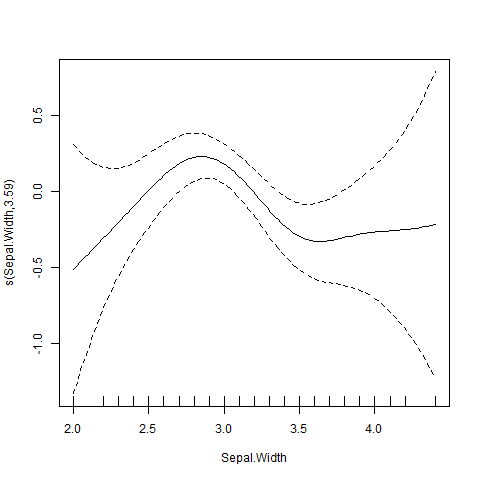

In [10]:
%%R
library(mgcv)
fit <- gam(Sepal.Length ~ s(Sepal.Width), data = iris)
plot(fit)

## Use self defined functions

In [13]:
import os
os.environ["RPY2_CFFI_MODE"] = "ABI"
# os.environ["PYTHONIOENCODING"] = "utf-8"
from rpy2 import robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri, numpy2ri
from rpy2.robjects.conversion import localconverter
import pandas as pd

base = importr("base")
print(ro.r("R.version.string"))

[1] "R version 4.5.2 (2025-10-31 ucrt)"



In [14]:
bam_fit = ro.globalenv["fit_gam_api"]
bam_pred = ro.globalenv["predict_gam_api"]

KeyError: "'fit_gam_api' not found"

In [ ]:
def _py_to_r_df(df: pd.DataFrame):
    with localconverter(ro.default_converter + pandas2ri.converter):
        return ro.conversion.py2rpy(df)

def _r_to_py(obj):
    # try numpy then pandas; handle vectors/matrices
    with localconverter(ro.default_converter + numpy2ri.converter + pandas2ri.converter):
        return ro.conversion.rpy2py(obj)

In [ ]:
df = pd.DataFrame({"x": range(1, 201)})
df["y"] = (df["x"] ** 0.5) + 0.1 * (df["x"] % 7)

In [ ]:
res = bam_fit(_py_to_r_df(df), "y ~ s(x, k=20)", family_str="gaussian", num_cores=4)

ok = bool(res.rx2("ok")[0])
if not ok:
    print("R error:", str(res.rx2("error")[0]))
else:
    fit = res.rx2("model")

In [ ]:
from rpy2 import robjects as ro
from rpy2.rinterface_lib.sexp import NULLType
from rpy2.robjects.vectors import (
    BoolVector,
    IntVector,
    FloatVector,
    StrVector,
    ListVector
)

def r_to_py(obj):
    """
    Convert common rpy2 R objects into clean Python objects.
    """
    # NULL -> None
    if isinstance(obj, NULLType):
        return None

    # Atomic vectors of length 1 -> scalar
    if isinstance(obj, (BoolVector, IntVector, FloatVector, StrVector)):
        if len(obj) == 1:
            return obj[0]
        else:
            return list(obj)

    # ListVector -> dict (recursive)
    if isinstance(obj, ListVector):
        return {name: r_to_py(obj.rx2(name)) for name in obj.names}

    # Fallback: use rpy2 converters (numpy / pandas)
    try:
        return _r_to_py(obj)
    except Exception:
        return obj

In [ ]:
with localconverter(ro.default_converter):
    c = ro.conversion.rpy2py(res.rx2('ok'))

In [ ]:
ro.conversion.rpy2py(res.rx2('model'))

<rpy2.robjects.vectors.ListVector object at 0x000002A2B48F5950> [19]
R classes: ('bam', 'gam', 'glm', 'lm')
[FloatSexp..., FloatSexp..., ListSexpV..., FloatSexp..., ..., ListSexpV..., SexpClosure, FloatSexp..., FloatSexp...]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x000002A2FFB61210> [14]
R classes: ('numeric',)
[9.761421, 8.883221, 2.030468, 2.715913, ..., -0.034681, 0.030177, 0.022175, 6.433454]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x000002A2B3906A10> [14]
R classes: ('numeric',)
[-0.620305, -0.294152, -0.064104, 0.116741, ..., -0.188990, -0.088194, 0.012525, 0.113160]
<rpy2.robjects.vectors.ListVector object at 0x000002A2B48F5950> [19]
R classes: ('bam', 'gam', 'glm', 'lm')
[FloatSexp..., FloatSexp..., ListSexpV..., FloatSexp..., ..., ListSexpV..., SexpClosure, FloatSexp..., FloatSexp...]
  linear.predictors: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x000002A2B39046D0> [14]
R classes: ('numeric',)
[1.720305, 1.908365, 2.096155, 2.283259, ..., 14.324659, 14.359441, 14.394211, 14.428976]
...
<rpy2.robjects.vectors.ListVector object at 0x000002A2B48F5950> [19]
R classes: ('bam', 'gam', 'glm', 'lm')
[FloatSexp..., FloatSexp..., ListSexpV..., FloatSexp..., ..., ListSexpV..., SexpClosure, FloatSexp..., FloatSexp...]
  weights: <class 'rpy2.robjects.functions.SignatureTranslatedFunction'>
  <rpy2.robjects.functions.SignatureTranslatedFunction object at 0x000002A2B391FA10> [3]
R classes: ('function',)
  working.weights: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x000002A2B391E7D0> [14]
R classes: ('numeric',)
[1.720305, 1.908365, 2.096155, 2.283259, ..., 14.324659, 14.359441, 14.394211, 14.428976]
  prior.weights: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x000002A2B391E550> [14]
R classes: ('numeric',)
[2201.419916]

In [ ]:
r_to_py(res.rx2('error'))

In [ ]:
fit.names

'coeffici...,'residuals','family',...,'NA.action','fitted.v...,'null.dev...


In [ ]:
r_to_py(res.rx2('model').rx2('residuals'))

[-0.6203052957723698,
 -0.29415176587281344,
 -0.06410444081133271,
 0.11674086180526322,
 0.2669405015214643,
 0.3963629603992138,
 -0.18883456306165325,
 -0.0844105592896165,
 0.012744350023804252,
 0.10499384053570271,
 0.19416474674253825,
 0.28166970220393583,
 0.36858586118528436,
 -0.24428921562245476,
 -0.1563935533718266,
 -0.06736290553935387,
 0.023003806622048373,
 0.11477696582002483,
 0.2079268993604506,
 0.3023524194218563,
 -0.3020932576131221,
 -0.20557979703617146,
 -0.10828075556305361,
 -0.01035868173073684,
 0.08804552983046854,
 0.18681909302946664,
 0.28587988016993826,
 -0.31482444632353257,
 -0.21532007285971577,
 -0.11561268711672756,
 -0.01569433456974778,
 0.08444932341437106,
 0.18483208977442356,
 0.2854612790818045,
 -0.3136667877312078,
 -0.21256953387161115,
 -0.11127899786164797,
 -0.009840879053393259,
 0.09168802868056858,
 0.19324367051903568,
 0.2947593942305913,
 -0.30382904319554527,
 -0.2025786176220441,
 -0.10153478271063054,
 -0.00072819714755

In [ ]:
import numpy as np
import pandas as pd
from typing import Literal

predict_parallel = ro.globalenv["predict_gam_parallel_api"]

def predict_with_cluster(
    r_model,
    df: pd.DataFrame,
    type: Literal["response", "terms"] = "response",
    num_cores: int = 4,
    num_split: int = 8,
):
    r_df = _py_to_r_df(df)
    pred_r = predict_parallel(r_model, r_df, type, num_cores, num_split)

    pred_py = _r_to_py(pred_r)

    if type == "response":
        return np.asarray(pred_py)  # 1d
    else:
        # terms usually matrix -> ndarray; wrap DataFrame for readability
        if isinstance(pred_py, np.ndarray):
            return pd.DataFrame(pred_py)
        return pred_py

KeyError: "'predict_gam_parallel_api' not found"

In [ ]:
ro.r('Sys.setenv(LANGUAGE="en")')
ro.r('Sys.setlocale("LC_ALL", "C")')


'C'


In [ ]:
# predict_w_cluster = ro.globalenv["predict_gam_parallel_api"]

# pred_r = predict_w_cluster(fit, _py_to_r_df(df), type="response", num_cores_predict=8, num_split=8)


pred_r = bam_pred(fit, _py_to_r_df(df), type="response", num_cores_predict=8, num_split=8)
pred = _r_to_py(pred_r)   # numpy/pandas converter


[1] "from size 0 to 0"
[1] "Prdeict with 8 cores."
[1] "Closing Cluster"
Time difference of 1.206884 secs


In [ ]:
for i in fit.names:
    print(i)

coefficients
residuals
family
linear.predictors
deviance
iter
weights
working.weights
prior.weights
z
df.null
y
converged
boundary
NCV
NCV1
rV
Vg
db.drho
ldetS1
reml.scale
aic
rank
warn
sp
gcv.ubre
outer.info
scale
scale.estimated
control
method
Vp
Ve
V.sp
edf
edf1
edf2
hat
F
R
Vc
nsdf
sig2
smooth
formula
var.summary
cmX
terms
pred.formula
pterms
assign
offset
df.residual
min.edf
optimizer
call
AR1.rho
gamma
G
qrx
weights.name
data
model
NA.action
fitted.values
null.deviance


In [ ]:
from quantbullet.r.rpy_convert import r_df_to_py

In [ ]:
ro.r('plot.gam')(fit, pages=1)

[no name],[19]


In [ ]:
r_df_to_py( fit.rx2['model'] )

,y,x,(weights)
1,1.100000,1,1.0
2,1.614214,2,1.0
3,2.032051,3,1.0
4,2.400000,4,1.0
5,2.736068,5,1.0
...,...,...,...
196,14.000000,196,1.0
197,14.135669,197,1.0
198,14.271247,198,1.0
199,14.406736,199,1.0


In [ ]:
pred

array([ 1.7203053 ,  1.90836533,  2.09615525,  2.28325914,  2.46912748,
        2.65312678,  2.83458587,  3.01283768,  3.18725565,  3.35728382,
        3.52246004,  3.68243191,  3.83696541,  3.9859466 ,  4.1293769 ,
        4.26736291,  4.40010182,  4.52786372,  4.65097204,  4.76978354,
        4.88466895,  4.99599556,  5.10411228,  5.20933817,  5.31195447,
        5.41220042,  5.51027254,  5.60632707,  5.70048488,  5.79283826,
        5.8834587 ,  5.97240493,  6.05973056,  6.14549062,  6.22974657,
        6.31256953,  6.39404153,  6.47425488,  6.55330997,  6.63131165,
        6.70836484,  6.78456974,  6.86001714,  6.93478436,  7.00893213,
        7.08250269,  7.15551936,  7.22798742,  7.29989642,  7.37122355,
        7.44193775,  7.51200436,  7.5813897 ,  7.65006542,  7.71801204,
        7.78522162,  7.85169926,  7.91746334,  7.9825446 ,  8.04698408,
        8.11083032,  8.1741358 ,  8.23695328,  8.29933211,  8.36131494,
        8.42293516,  8.48421507,  8.54516518,  8.60578446,  8.66